In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import seaborn as sns
import datetime as dt
import yaml
from pandas.tseries import offsets
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator, NullLocator)
import matplotlib.dates as mdates

In [5]:
swq = pd.read_csv('../input/RadarBoxSWQ20200112-20200427.csv.gz', sep='|', quotechar='"')

In [6]:
wal = pd.read_csv('../input/RadarBoxWAL20200116-20200417.csv.gz', sep='|', quotechar='"')

In [7]:
swq.head()

,Date,Flight,Departure,STD,Arrival,STA,Aircraft,Status,Duration,Unnamed: 9
0,31-Mar,WQ3507,"El Paso, TX (ELP/KELP)",18:40 MDT,"Phoenix, AZ (AZA/KIWA)",-,B733 (N529AU),Landed 17:28 MST,00h52m,NaN
1,31-Mar,WQ3521,"San Diego, CA (SAN/KSAN)",-,"Phoenix, AZ (AZA/KIWA)",-,B733 (N531AU),Landed 17:41 MST,00h51m,NaN
2,31-Mar,WQ3601,"Laredo, TX (LRD/KLRD)",17:50 CDT,"Alexandria, LA (AEX/KAEX)",-,B734 (N285XA),Landed 19:18 CDT,01h11m,NaN
3,31-Mar,WQ3520,"Victorville, CA (VCV/KVCV)",15:00 PDT,"San Diego, CA (SAN/KSAN)",-,B733 (N531AU),Landed 15:21 PDT,00h32m,NaN
4,31-Mar,WQ3570,"Alexandria, LA (AEX/KAEX)",16:55 CDT,"Brownsville, TX (BRO/KBRO)",-,B734 (N418US),Landed,01h12m,NaN


In [8]:
wal.head()

,Date,Flight,Departure,STD,Arrival,STA,Aircraft,Status,Duration,Unnamed: 9
0,17 Apr,WAL3114,Georgetown(GCM/MWCR),-,"Miami, FL(MIA/KMIA)",-,MD83,Landed,01h09m,
1,17 Apr,WAL3113,Georgetown(GCM/MWCR),-,"Miami, FL(MIA/KMIA)",-,MD83 (N801WA),Landed 17:01 EDT,01h07m,
2,17 Apr,WAL3113,"Miami, FL(MIA/KMIA)",12:30 EDT,Georgetown(GCM/MWCR),-,MD83 (N801WA),Landed 13:18 EST,01h03m,
3,8 Apr,WAL700,"Charlotte, NC(CLT/KCLT)",-,"Miami, FL(MIA/KMIA)",-,MD83 (N801WA),Landed 18:17 EDT,01h26m,NaN
4,8 Apr,WAL9700,"Charlotte, NC(CLT/KCLT)",15:30 EDT,"Miami, FL(MIA/KMIA)",-,MD83,Landed,01h27m,NaN


In [25]:
wal_tails = wal['Aircraft'].unique()

In [26]:
def extract(string, start='(', stop=')'):
    return string[string.index(start)+1:string.index(stop)]

In [27]:
cleaned = []
for i in wal_tails:
    try: 
        j = extract(i)
        cleaned.append(j)
    except ValueError:
        pass
wal_tails = cleaned
del cleaned

In [28]:
wal_tails

['N801WA', 'N805WA', 'N806WA', 'N807TR', 'N808WA', 'N804WA']

In [7]:
swq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5139 entries, 0 to 5138
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        5139 non-null   object
 1   Flight      5139 non-null   object
 2   Departure   5139 non-null   object
 3   STD         5139 non-null   object
 4   Arrival     5139 non-null   object
 5   STA         5139 non-null   object
 6   Aircraft    5139 non-null   object
 7   Status      5139 non-null   object
 8   Duration    5139 non-null   object
 9   Unnamed: 9  311 non-null    object
dtypes: object(10)
memory usage: 401.6+ KB


In [8]:
wal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 755 entries, 0 to 754
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        755 non-null    object
 1   Flight      755 non-null    object
 2   Departure   755 non-null    object
 3   STD         755 non-null    object
 4   Arrival     755 non-null    object
 5   STA         755 non-null    object
 6   Aircraft    755 non-null    object
 7   Status      755 non-null    object
 8   Duration    755 non-null    object
 9   Unnamed: 9  3 non-null      object
dtypes: object(10)
memory usage: 59.1+ KB


In [9]:
swq['Date'] = [x + ' 2020' for x in swq['Date']]
wal['Date'] = [x + ' 2020' for x in wal['Date']]

In [10]:
swq['Date'] = pd.to_datetime(swq['Date'])
wal['Date'] = pd.to_datetime(wal['Date'])

In [11]:
swq['Airline'] = 'SwiftAir/iAero'
wal['Airline'] = 'World Atlantic'

In [12]:
swq = swq.replace('-', np.nan)
wal = wal.replace('-', np.nan)
swq = swq.replace(u'\xa0', ' ')
wal = wal.replace(u'\xa0', ' ')

In [13]:
swq = swq.sort_values(by='Date', ascending=False)

In [14]:
swq.set_index('Date').loc['2020-04-16']

,Flight,Departure,STD,Arrival,STA,Aircraft,Status,Duration,Unnamed: 9,Airline
Date,,,,,,,,,,
2020-04-16,WQ3511,NaN,NaN,NaN,NaN,B734 (N441US),Landed,NaN,,SwiftAir/iAero
2020-04-16,WQ3510,"Miami, FL(MIA/KMIA)",NaN,"Columbus, GA(CSG/KCSG)",NaN,B734 (N441US),Landed,NaN,,SwiftAir/iAero
2020-04-16,WQ3569,"Alexandria, LA(AEX/KAEX)",06:30 CDT,"Minneapolis, MN(MSP/KMSP)",NaN,B734 (N430XA),Landed 08:51 CDT,02h12m,,SwiftAir/iAero
2020-04-16,WQ3511,"Columbus, GA(CSG/KCSG)",09:40 EDT,"Alexandria, LA(AEX/KAEX)",NaN,B734 (N441US),Landed,01h19m,,SwiftAir/iAero
2020-04-16,WQ3570,"Minneapolis, MN(MSP/KMSP)",NaN,"Omaha, NE(OMA/KOMA)",NaN,B734 (N430XA),Landed 10:38 CDT,00h50m,,SwiftAir/iAero
2020-04-16,WQ3513,"Alexandria, LA(AEX/KAEX)",11:05 CDT,"Brownsville, TX(BRO/KBRO)",NaN,B734,Landed,01h15m,,SwiftAir/iAero
2020-04-16,WQ3571,"Omaha, NE(OMA/KOMA)",12:10 CDT,"Kansas City, MO(MCI/KMCI)",NaN,B734 (N430XA),Landed 12:06 CDT,00h29m,,SwiftAir/iAero
2020-04-16,WQ3514,"Brownsville, TX(BRO/KBRO)",13:40 CDT,"Miami, FL(MIA/KMIA)",NaN,B734 (N441US),Landed 17:34 EDT,02h12m,,SwiftAir/iAero
2020-04-16,WQ3580,"Kansas City, MO(MCI/KMCI)",13:55 CDT,"Brownsville, TX(BRO/KBRO)",NaN,B734 (N430XA),Landed,02h16m,,SwiftAir/iAero


In [15]:
df = pd.concat([swq, wal], sort=False).reset_index(drop=True)

In [16]:
len(df)

5894

In [17]:
len(df.drop_duplicates())

5885

In [18]:
df=df.drop_duplicates()

In [19]:
df['Aircraft'] = df['Aircraft'].str.replace(u'\xa0', ' ')
df['Arrival'] = df['Arrival'].str.replace(u'\xa0', ' ')
df['Departure'] = df['Departure'].str.replace(u'\xa0', ' ')

In [20]:
df.head()

,Date,Flight,Departure,STD,Arrival,STA,Aircraft,Status,Duration,Unnamed: 9,Airline
0,2020-04-27,WQ3555,"Harrisburg, PA(MDT/KMDT)",12:45 EDT,"Brownsville, TX(BRO/KBRO)",NaN,B734 (N430XA),Est. Arrival 15:21 CDT,03h43m,LIVE,SwiftAir/iAero
1,2020-04-27,WQ501,Guatemala City(GUA/MGGT),NaN,"Miami, FL(MIA/KMIA)",NaN,B733 (N811TJ),Est. Arrival 14:17 EDT,02h25m,LIVE,SwiftAir/iAero
2,2020-04-27,WQ3520,"Houston, TX(IAH/KIAH)",08:10 CDT,La Mesa(SAP/MHLM),NaN,B734 (N441US),Landed,02h18m,,SwiftAir/iAero
3,2020-04-27,WQ3554,"Alexandria, LA(AEX/KAEX)",08:00 CDT,"Harrisburg, PA(MDT/KMDT)",NaN,B734 (N430XA),Landed 11:29 EDT,02h22m,,SwiftAir/iAero
4,2020-04-27,WQ500,"Miami, FL(MIA/KMIA)",07:00 EDT,Guatemala City(GUA/MGGT),NaN,B733 (N811TJ),Landed,02h41m,,SwiftAir/iAero


In [21]:
df.set_index('Date').groupby(pd.Grouper(freq='M'))['Flight'].count()

Date
2020-01-31    1477
2020-02-29    2336
2020-03-31    1744
2020-04-30     328
Freq: M, Name: Flight, dtype: int64

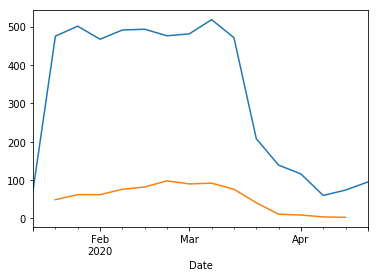

In [22]:
swq.set_index('Date').groupby(pd.Grouper(freq='W-MON'))['Flight'].count().plot()
wal.set_index('Date').groupby(pd.Grouper(freq='W-MON'))['Flight'].count().plot()

In [23]:
swq.set_index('Date').groupby(pd.Grouper(freq='W-MON'))['Flight'].count()

Date
2020-01-13     74
2020-01-20    475
2020-01-27    501
2020-02-03    467
2020-02-10    491
2020-02-17    493
2020-02-24    476
2020-03-02    481
2020-03-09    518
2020-03-16    471
2020-03-23    208
2020-03-30    139
2020-04-06    116
2020-04-13     60
2020-04-20     74
2020-04-27     95
Freq: W-MON, Name: Flight, dtype: int64

In [24]:
temp = df['Arrival'].str.split('(', expand=True)
df['ArrivalLoc'] = temp[0].str.strip()
temp = temp[1].str.split('/', expand=True)
df['ArrivalIATA'] = temp[0]
df['ArrivalICAO'] = temp[1]
df['ArrivalICAO'] = df['ArrivalICAO'].str.replace(')', '')

In [25]:
temp = df['Departure'].str.split('(', expand=True)
df['DepartureLoc'] = temp[0].str.strip()
temp = temp[1].str.split('/', expand=True)
df['DepartureIATA'] = temp[0]
df['DepartureICAO'] = temp[1]
df['DepartureICAO'] = df['DepartureICAO'].str.replace(')', '')

In [26]:
df.groupby('DepartureICAO')['Flight'].count().sort_values(ascending=False).head(30)

DepartureICAO
KMIA    1149
MUHA     359
KAEX     211
KBRO     206
MDSD     165
KIWA     152
KSAT     129
MUSC     120
MGGT     109
MUHG      82
MUCM      76
KELP      70
MHLM      70
MWCR      69
KACY      66
MDPC      58
KGSO      58
KCSG      56
KEWR      54
KIFP      54
KBNA      52
KRDU      49
KTPA      47
TJSJ      47
KMEM      45
KIAH      41
MUCU      38
KPHL      37
MSLP      37
KDAL      37
Name: Flight, dtype: int64

In [27]:
df.groupby(['DepartureICAO', 'ArrivalICAO'])['Flight'].count().sort_values(ascending=False).head(25)

DepartureICAO  ArrivalICAO
MUHA           KMIA           345
KMIA           MUHA           341
MDSD           KMIA           157
KMIA           MDSD           156
               MUSC           113
MUSC           KMIA           110
KMIA           MUHG            76
MUHG           KMIA            76
MUCM           KMIA            76
KMIA           MUCM            72
               MDPC            60
MDPC           KMIA            56
KAEX           KBRO            54
KSAT           KBRO            39
KMIA           MUCU            38
MUCU           KMIA            38
TJSJ           KMIA            37
KMIA           KCSG            35
KBRO           KAEX            33
               MGGT            33
KMIA           TJSJ            32
MGGT           KIWA            31
KBRO           MHLM            30
KIWA           KELP            29
MUVR           KMIA            26
Name: Flight, dtype: int64

In [28]:
ice_us = ["Alexandria, LA (AEX/KAEX)",
#           "Phoenix, AZ (AZA/KIWA)",
          "Brownsville, TX (BRO/KBRO)",
#           "El Paso, TX (ELP/KELP)",
#           "San Antonio, TX (SAT/KSAT)",
          "Yakima, WA (YKM/KYKM)"]

In [29]:
df[df['Departure'].isin(ice_us)].set_index('Date').groupby(pd.Grouper(freq='M'))['Flight'].count()

Date
2020-01-31     54
2020-02-29    110
2020-03-31    105
Freq: M, Name: Flight, dtype: int64

In [30]:
len(set(df['Aircraft']))

52

In [31]:
set(df['Aircraft'].head())

{'B733 (N811TJ)', 'B734 (N430XA)', 'B734 (N441US)'}

In [32]:
ice_flights = set(df[df['Departure'].isin(ice_us)]['Aircraft'])

In [33]:
ice_flights = ice_flights.union(set(df[df['Arrival'].isin(ice_us)]['Aircraft']))

In [34]:
df[df['Aircraft'].isin(ice_flights)].set_index('Date').groupby(pd.Grouper(freq='W-MON'))['Aircraft'].count()

Date
2020-01-13     54
2020-01-20    336
2020-01-27    349
2020-02-03    330
2020-02-10    349
2020-02-17    363
2020-02-24    329
2020-03-02    333
2020-03-09    368
2020-03-16    335
2020-03-23    155
2020-03-30    119
2020-04-06     84
2020-04-13     54
2020-04-20     65
2020-04-27     75
Freq: W-MON, Name: Aircraft, dtype: int64

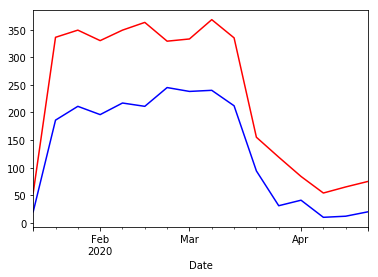

In [35]:
df[df['Aircraft'].isin(ice_flights)].set_index('Date').groupby(pd.Grouper(freq='W-MON'))['Aircraft'].count().plot(c='r')
df[~df['Aircraft'].isin(ice_flights)].set_index('Date').groupby(pd.Grouper(freq='W-MON'))['Aircraft'].count().plot(c='b')

In [36]:
df[df['Aircraft'].isin(ice_flights)].head(10)

,Date,Flight,Departure,STD,Arrival,STA,Aircraft,Status,Duration,Unnamed: 9,Airline,ArrivalLoc,ArrivalIATA,ArrivalICAO,DepartureLoc,DepartureIATA,DepartureICAO
0,2020-04-27,WQ3555,"Harrisburg, PA(MDT/KMDT)",12:45 EDT,"Brownsville, TX(BRO/KBRO)",NaN,B734 (N430XA),Est. Arrival 15:21 CDT,03h43m,LIVE,SwiftAir/iAero,"Brownsville, TX",BRO,KBRO,"Harrisburg, PA",MDT,KMDT
2,2020-04-27,WQ3520,"Houston, TX(IAH/KIAH)",08:10 CDT,La Mesa(SAP/MHLM),NaN,B734 (N441US),Landed,02h18m,,SwiftAir/iAero,La Mesa,SAP,MHLM,"Houston, TX",IAH,KIAH
3,2020-04-27,WQ3554,"Alexandria, LA(AEX/KAEX)",08:00 CDT,"Harrisburg, PA(MDT/KMDT)",NaN,B734 (N430XA),Landed 11:29 EDT,02h22m,,SwiftAir/iAero,"Harrisburg, PA",MDT,KMDT,"Alexandria, LA",AEX,KAEX
5,2020-04-27,WQ3518,"Miami, FL(MIA/KMIA)",05:20 EDT,"Houston, TX(IAH/KIAH)",NaN,B734 (N441US),Landed,02h25m,,SwiftAir/iAero,"Houston, TX",IAH,KIAH,"Miami, FL",MIA,KMIA
7,2020-04-26,WQ9627,"Greensboro, NC(GSO/KGSO)",NaN,"San Antonio, TX(SAT/KSAT)",NaN,B733 (N627SW),Landed 18:35 CDT,02h50m,,SwiftAir/iAero,"San Antonio, TX",SAT,KSAT,"Greensboro, NC",GSO,KGSO
10,2020-04-26,WQ9702,"Alexandria, LA(AEX/KAEX)",13:00 CDT,"Miami, FL(MIA/KMIA)",NaN,B734 (N538CC),Landed 16:23 EDT,02h25m,,SwiftAir/iAero,"Miami, FL",MIA,KMIA,"Alexandria, LA",AEX,KAEX
11,2020-04-25,WQ3530,San Juan(SJU/TJSJ),14:35 AST,"Phoenix, AZ(AZA/KIWA)",NaN,B738 (N820TJ),Landed 18:19 MST,06h27m,,SwiftAir/iAero,"Phoenix, AZ",AZA,KIWA,San Juan,SJU,TJSJ
12,2020-04-25,WQ9701,"Miami, FL(MIA/KMIA)",07:00 EDT,Oranjestad(AUA/TNCA),NaN,B738 (N624XA),Landed 09:38 AST,02h23m,,SwiftAir/iAero,Oranjestad,AUA,TNCA,"Miami, FL",MIA,KMIA
13,2020-04-25,WQ3529,"Belo Horizonte, MG(CNF/SBCF)",NaN,San Juan(SJU/TJSJ),NaN,B738 (N820TJ),Landed 13:16 AST,NaN,,SwiftAir/iAero,San Juan,SJU,TJSJ,"Belo Horizonte, MG",CNF,SBCF
15,2020-04-25,WQ902,Willemstad(CUR/TNCC),NaN,"Miami, FL(MIA/KMIA)",NaN,B738 (N624XA),Landed 18:09 EDT,02h24m,,SwiftAir/iAero,"Miami, FL",MIA,KMIA,Willemstad,CUR,TNCC


In [37]:
df.head(10)

,Date,Flight,Departure,STD,Arrival,STA,Aircraft,Status,Duration,Unnamed: 9,Airline,ArrivalLoc,ArrivalIATA,ArrivalICAO,DepartureLoc,DepartureIATA,DepartureICAO
0,2020-04-27,WQ3555,"Harrisburg, PA(MDT/KMDT)",12:45 EDT,"Brownsville, TX(BRO/KBRO)",NaN,B734 (N430XA),Est. Arrival 15:21 CDT,03h43m,LIVE,SwiftAir/iAero,"Brownsville, TX",BRO,KBRO,"Harrisburg, PA",MDT,KMDT
1,2020-04-27,WQ501,Guatemala City(GUA/MGGT),NaN,"Miami, FL(MIA/KMIA)",NaN,B733 (N811TJ),Est. Arrival 14:17 EDT,02h25m,LIVE,SwiftAir/iAero,"Miami, FL",MIA,KMIA,Guatemala City,GUA,MGGT
2,2020-04-27,WQ3520,"Houston, TX(IAH/KIAH)",08:10 CDT,La Mesa(SAP/MHLM),NaN,B734 (N441US),Landed,02h18m,,SwiftAir/iAero,La Mesa,SAP,MHLM,"Houston, TX",IAH,KIAH
3,2020-04-27,WQ3554,"Alexandria, LA(AEX/KAEX)",08:00 CDT,"Harrisburg, PA(MDT/KMDT)",NaN,B734 (N430XA),Landed 11:29 EDT,02h22m,,SwiftAir/iAero,"Harrisburg, PA",MDT,KMDT,"Alexandria, LA",AEX,KAEX
4,2020-04-27,WQ500,"Miami, FL(MIA/KMIA)",07:00 EDT,Guatemala City(GUA/MGGT),NaN,B733 (N811TJ),Landed,02h41m,,SwiftAir/iAero,Guatemala City,GUA,MGGT,"Miami, FL",MIA,KMIA
5,2020-04-27,WQ3518,"Miami, FL(MIA/KMIA)",05:20 EDT,"Houston, TX(IAH/KIAH)",NaN,B734 (N441US),Landed,02h25m,,SwiftAir/iAero,"Houston, TX",IAH,KIAH,"Miami, FL",MIA,KMIA
6,2020-04-26,WQ401,San Juan(SJU/TJSJ),10:00 AST,"Miami, FL(MIA/KMIA)",NaN,B733 (N811TJ),Landed 12:16 EDT,02h16m,,SwiftAir/iAero,"Miami, FL",MIA,KMIA,San Juan,SJU,TJSJ
7,2020-04-26,WQ9627,"Greensboro, NC(GSO/KGSO)",NaN,"San Antonio, TX(SAT/KSAT)",NaN,B733 (N627SW),Landed 18:35 CDT,02h50m,,SwiftAir/iAero,"San Antonio, TX",SAT,KSAT,"Greensboro, NC",GSO,KGSO
8,2020-04-26,WQ400,"Miami, FL(MIA/KMIA)",06:00 EDT,San Juan(SJU/TJSJ),NaN,B733 (N811TJ),Landed 08:46 AST,02h12m,,SwiftAir/iAero,San Juan,SJU,TJSJ,"Miami, FL",MIA,KMIA
9,2020-04-26,WQ9701,"Miami, FL(MIA/KMIA)",14:00 EDT,"Miami, FL(MIA/KMIA)",NaN,B734 (N440US),Landed 15:36 EDT,01h28m,,SwiftAir/iAero,"Miami, FL",MIA,KMIA,"Miami, FL",MIA,KMIA


In [38]:
targets = ['MGGT']
stop_cols = ['DepartureICAO', 'ArrivalICAO']

In [39]:
target_found = df[stop_cols].apply(lambda x: x.isin(targets)).sum(axis=1) > 0

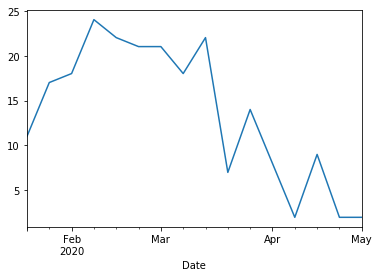

In [40]:
df[target_found].set_index('Date').groupby(pd.Grouper(freq='W'))['Flight'].count().plot()

In [41]:
df[df['Arrival'] == 'Guatemala City (GUA/MGGT)'].set_index('Date').groupby(pd.Grouper(freq='W'))['Flight'].count()

Date
2020-01-19    4
2020-01-26    6
2020-02-02    6
2020-02-09    7
2020-02-16    7
2020-02-23    6
2020-03-01    7
2020-03-08    6
2020-03-15    8
2020-03-22    3
2020-03-29    7
2020-04-05    2
Freq: W-SUN, Name: Flight, dtype: int64

In [42]:
df['Date'].min()

Timestamp('2020-01-12 00:00:00')

In [43]:
df['Date'].max()

Timestamp('2020-04-27 00:00:00')

In [44]:
df.to_csv('../output/RadarboxSWQ+WAL20200112-20200427.csv', sep=',', quotechar='"', encoding='utf-8')

In [45]:
mggt_all = df[target_found].sort_values(by='Date', ascending=False).set_index('Date')

In [46]:
mggt_all.loc['2020-04']

,Flight,Departure,STD,Arrival,STA,Aircraft,Status,Duration,Unnamed: 9,Airline,ArrivalLoc,ArrivalIATA,ArrivalICAO,DepartureLoc,DepartureIATA,DepartureICAO
Date,,,,,,,,,,,,,,,,
2020-04-27,WQ501,Guatemala City(GUA/MGGT),NaN,"Miami, FL(MIA/KMIA)",NaN,B733 (N811TJ),Est. Arrival 14:17 EDT,02h25m,LIVE,SwiftAir/iAero,"Miami, FL",MIA,KMIA,Guatemala City,GUA,MGGT
2020-04-27,WQ500,"Miami, FL(MIA/KMIA)",07:00 EDT,Guatemala City(GUA/MGGT),NaN,B733 (N811TJ),Landed,02h41m,,SwiftAir/iAero,Guatemala City,GUA,MGGT,"Miami, FL",MIA,KMIA
2020-04-24,WQ3560,"El Paso, TX(ELP/KELP)",12:15 MDT,Guatemala City(GUA/MGGT),NaN,B734 (N803TJ),Landed,03h14m,,SwiftAir/iAero,Guatemala City,GUA,MGGT,"El Paso, TX",ELP,KELP
2020-04-24,WQ3561,Guatemala City(GUA/MGGT),17:00 CST,"Brownsville, TX(BRO/KBRO)",NaN,B734 (N803TJ),Landed,02h17m,,SwiftAir/iAero,"Brownsville, TX",BRO,KBRO,Guatemala City,GUA,MGGT
2020-04-19,WQ3547,"El Paso, TX(ELP/KELP)",NaN,Guatemala City(GUA/MGGT),NaN,B734 (N418US),Landed,NaN,,SwiftAir/iAero,Guatemala City,GUA,MGGT,"El Paso, TX",ELP,KELP
2020-04-19,WQ3548,Guatemala City(GUA/MGGT),17:00 CST,"Brownsville, TX(BRO/KBRO)",NaN,B734 (N418US),Landed,02h06m,,SwiftAir/iAero,"Brownsville, TX",BRO,KBRO,Guatemala City,GUA,MGGT
2020-04-15,WQ3509,Guatemala City(GUA/MGGT),19:15 CST,"Alexandria, LA(AEX/KAEX)",NaN,B734 (N430XA),Landed,02h40m,,SwiftAir/iAero,"Alexandria, LA",AEX,KAEX,Guatemala City,GUA,MGGT
2020-04-14,WQ3535,Guatemala City(GUA/MGGT),17:30 CST,"Brownsville, TX(BRO/KBRO)",NaN,B733 (N626SW),Landed,02h13m,,SwiftAir/iAero,"Brownsville, TX",BRO,KBRO,Guatemala City,GUA,MGGT
2020-04-14,WQ3534,"Brownsville, TX(BRO/KBRO)",15:05 CDT,Guatemala City(GUA/MGGT),NaN,B733 (N626SW),Landed,02h09m,,SwiftAir/iAero,Guatemala City,GUA,MGGT,"Brownsville, TX",BRO,KBRO


In [48]:
mggt_all.to_csv('../output/MGGTAll20200112-20200427.csv', sep=',', quotechar='"', encoding='utf-8')